<a href="https://colab.research.google.com/github/Johno4308/ML_googleColab/blob/main/PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating, Reading and Writing

You can't work with data if you can't read it. Get started here.

## Introduction

In this micro-course, you'll learn all about pandas, the most popular Python library for data analysis.

Along the way, you'll complete several hands-on exercises with real-world data. We recommend that you work on the exercises while reading the corresponding tutorials.

To start the first exercise, please click here.

In this tutorial, you will learn how to create your own data, along with how to work with data that already exists.

Getting started
To use pandas, you'll typically start with the following line of code.





In [1]:
import pandas as pd

## Creating data
There are two core objects in pandas: the DataFrame and the Series.

## DataFrame
A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple DataFrame:

In [4]:
pd.DataFrame({'Yes': [50, 21, 23], 'No': [131, 2, 90], 'Maybe': [55, 60, 70]})

,Yes,No,Maybe
0,50,131,55
1,21,2,60
2,23,90,70


In this example, the "0, No" entry has the value of 131. The "0, Yes" entry has a value of 50, and so on.

DataFrame entries are not limited to integers. For instance, here's a DataFrame whose values are strings:

In [5]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names (Bob and Sue in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [6]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'],
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


## Series

A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [7]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [8]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

The Series and the DataFrame are intimately related. It's helpful to think of a DataFrame as actually being just a bunch of Series "glued together". We'll see more of this in the next section of this tutorial.

## Reading data files
Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

```
Product A,Product B,Product C,
30,21,9,
35,34,1,
41,11,11

```
So a CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a DataFrame. We'll use the pd.read_csv() function to read the data into a DataFrame. This goes thusly:


In [11]:
wine_reviews = pd.read_csv("winemag-data-130k-v2.csv")

We can use the shape attribute to check how large the resulting DataFrame is:

In [12]:
wine_reviews.shape

(2606, 14)

In [13]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


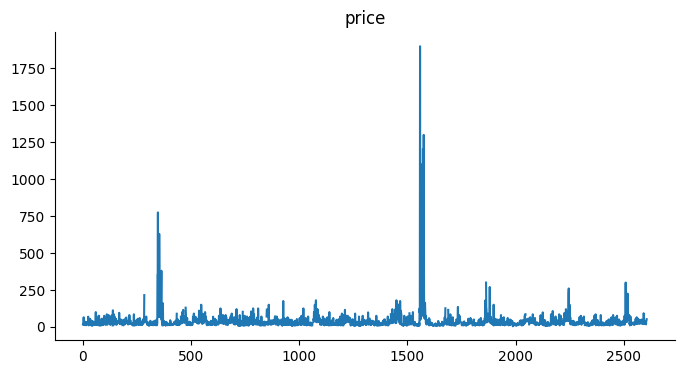

In [15]:
# @title price

from matplotlib import pyplot as plt
wine_reviews['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

The pd.read_csv() function is well-endowed, with over 30 optional parameters you can specify. For example, you can see in this dataset that the CSV file has a built-in index, which pandas did not pick up on automatically. To make pandas use that column for the index (instead of creating a new one from scratch), we can specify an index_col.

In [20]:
reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Indexing, Selecting & Assigning

Pro data scientists do this dozens of times a day. You can, too!

### Introduction

Selecting specific values of a pandas DataFrame or Series to work on is an implicit step in almost any data operation you'll run, so one of the first things you need to learn in working with data in Python is how to go about selecting the data points relevant to you quickly and effectively.

### Native accessors

Native Python objects provide good ways of indexing data. Pandas carries all of these over, which helps make it easy to start with.

Consider this DataFrame:

In [21]:
pd.set_option('display.max_rows', 5)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In Python, we can access the property of an object by accessing it as an attribute. A book object, for example, might have a title property, which we can access by calling book.title. Columns in a pandas DataFrame work in much the same way.

Hence to access the country property of reviews we can use:

In [22]:
reviews.country

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

If we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [23]:
reviews['country']

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

These are the two ways of selecting a specific Series out of a DataFrame. Neither of them is more or less syntactically valid than the other, but the indexing operator [] does have the advantage that it can handle column names with reserved characters in them (e.g. if we had a country providence column, reviews.country providence wouldn't work).

Doesn't a pandas Series look kind of like a fancy dictionary? It pretty much is, so it's no surprise that, to drill down to a single specific value, we need only use the indexing operator [] once more:

In [25]:
reviews['country'][10000]

'France'

## Indexing in pandas

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, loc and iloc. For more advanced operations, these are the ones you're supposed to be using.

Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. iloc follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [26]:
reviews.iloc[0]

country                                                    Italy
description    Aromas include tropical fruit, broom, brimston...
                                     ...                        
variety                                              White Blend
winery                                                   Nicosia
Name: 0, Length: 13, dtype: object

Both loc and iloc are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with iloc, we can do the following:

In [27]:
reviews.iloc[:, 0]

0            Italy
1         Portugal
            ...   
129969      France
129970      France
Name: country, Length: 129971, dtype: object

On its own, the : operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

In [28]:
reviews.iloc[:3, 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Or, to select just the second and third entries, we would do:

In [29]:
reviews.iloc[1:3, 0]

1    Portugal
2          US
Name: country, dtype: object

It's also possible to pass a list:

In [30]:
reviews.iloc[[0, 1, 2], 0]

0       Italy
1    Portugal
2          US
Name: country, dtype: object

Finally, it's worth knowing that negative numbers can be used in selection. This will start counting forwards from the end of the values. So for example here are the last five elements of the dataset.

In [31]:
reviews.iloc[-5:]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Label-based selection

The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

For example, to get the first entry in reviews, we would now do the following:

In [32]:
reviews.loc[0, 'country']

'Italy'

iloc is conceptually simpler than loc because it ignores the dataset's indices. When we use iloc we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. loc, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead. For example, here's one operation that's much easier using loc:

In [33]:
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]

,taster_name,taster_twitter_handle,points
0,Kerin O’Keefe,@kerinokeefe,87
1,Roger Voss,@vossroger,87
...,...,...,...
129969,Roger Voss,@vossroger,90
129970,Roger Voss,@vossroger,90


Choosing between loc and iloc
When choosing or transitioning between loc and iloc, there is one "gotcha" worth keeping in mind, which is that the two methods use slightly different indexing schemes.

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. loc, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that loc can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index df.loc['Apples':'Potatoes'] than it is to index something like df.loc['Apples', 'Potatoet'] (t coming after s in the alphabet).

This is particularly confusing when the DataFrame index is a simple numerical list, e.g. 0,...,1000. In this case df.iloc[0:1000] will return 1000 entries, while df.loc[0:1000] return 1001 of them! To get 1000 elements using loc, you will need to go one lower and ask for df.loc[0:999].

Otherwise, the semantics of using loc are the same as those for iloc.

Manipulating the index
Label-based selection derives its power from the labels in the index. Critically, the index we use is not immutable. We can manipulate the index in any way we see fit.

The set_index() method can be used to do the job. Here is what happens when we set_index to the title field:

In [34]:
reviews.set_index("title")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...
Domaine Marcel Deiss 2012 Pinot Gris (Alsace),France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Pinot Gris,Domaine Marcel Deiss
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace),France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Gewürztraminer,Domaine Schoffit


This is useful if you can come up with an index for the dataset which is better than the current one.

### Conditional selection

So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.

For example, suppose that we're interested specifically in better-than-average wines produced in Italy.

We can start by checking if each wine is Italian or not:

In [35]:
reviews.country == "Italy"

0          True
1         False
          ...  
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

This operation produced a Series of True/False booleans based on the country of each record. This result can then be used inside of loc to select the relevant data:

In [36]:
reviews.loc[reviews.country == 'Italy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


This DataFrame has ~20,000 rows. The original had ~130,000. That means that around 15% of wines originate from Italy.

We also wanted to know which ones are better than average. Wines are reviewed on a 80-to-100 point scale, so this could mean wines that accrued at least 90 points.

We can use the ampersand (&) to bring the two questions together:

In [37]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
120,Italy,"Slightly backward, particularly given the vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto
130,Italy,"At the first it was quite muted and subdued, b...",Bricco Rocche Brunate,91,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Brunate (Barolo),Nebbiolo,Ceretto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano


Suppose we'll buy any wine that's made in Italy or which is rated above average. For this we use a pipe (|):

In [40]:
reviews.loc[(reviews.country == 'France') | (reviews.price >= 200)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Pandas comes with a few built-in conditional selectors, two of which we will highlight here.

The first is isin. isin is lets you select data whose value "is in" a list of values. For example, here's how we can use it to select wines only from Italy or France:

In [41]:
reviews.loc[reviews.country.isin(['Italy', 'France'])]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


The second is isnull (and its companion notnull). These methods let you highlight values which are (or are not) empty (NaN). For example, to filter out wines lacking a price tag in the dataset, here's what we would do:

In [42]:
reviews.loc[reviews.price.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## Assigning data

Going the other way, assigning data to a DataFrame is easy. You can assign either a constant value:

In [43]:
reviews['critic'] = 'everyone'
reviews['critic']

0         everyone
1         everyone
            ...   
129969    everyone
129970    everyone
Name: critic, Length: 129971, dtype: object

Or with an iterable of values:

In [44]:
reviews['index_backwards'] = range(len(reviews), 0, -1)
reviews['index_backwards']

0         129971
1         129970
           ...  
129969         2
129970         1
Name: index_backwards, Length: 129971, dtype: int64

## Summary Functions and Maps

Extract insights from your data.

## Introduction

In the last tutorial, we learned how to select relevant data out of a DataFrame or Series. Plucking the right data out of our data representation is critical to getting work done, as we demonstrated in the exercises.

However, the data does not always come out of memory in the format we want it in right out of the bat. Sometimes we have to do some more work ourselves to reformat it for the task at hand. This tutorial will cover different operations we can apply to our data to get the input "just right".

To start the exercise for this topic, please click here.

We'll use the Wine Magazine data for demonstration.

In [46]:
import pandas as pd
pd.set_option('display.max_rows', 5)
import numpy as np
reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

In [47]:
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Summary functions
Pandas provides many simple "summary functions" (not an official name) which restructure the data in some useful way. For example, consider the describe() method:

In [48]:
reviews.points.describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

In [50]:
reviews.country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

This method generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the data type of the input. The output above only makes sense for numerical data; for string data here's what we get:

In [51]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

If you want to get some particular simple summary statistic about a column in a DataFrame or a Series, there is usually a helpful pandas function that makes it happen.

For example, to see the mean of the points allotted (e.g. how well an averagely rated wine does), we can use the mean() function:

In [52]:
reviews.points.mean()

88.44713820775404

To see a list of unique values we can use the unique() function:

In [53]:
reviews.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

To see a list of unique values and how often they occur in the dataset, we can use the value_counts() method:



In [57]:
reviews.taster_name.value_counts()

Roger Voss           25514
Michael Schachner    15134
                     ...  
Fiona Adams             27
Christina Pickard        6
Name: taster_name, Length: 19, dtype: int64

## Maps
A map is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values. In data science we often have a need for creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later. Maps are what handle this work, making them extremely important for getting your work done!

There are two mapping methods that you will use often.

map() is the first, and slightly simpler one. For example, suppose that we wanted to remean the scores the wines received to 0. We can do this as follows:

In [58]:
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

The function you pass to map() should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value. map() returns a new Series where all the values have been transformed by your function.

apply() is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.

In [59]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

reviews.apply(remean_points, axis='columns')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.447138,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.447138,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,1.552862,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,1.552862,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


If we had called reviews.apply() with axis='index', then instead of passing a function to transform each row, we would need to give a function to transform each column.

Note that map() and apply() return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. If we look at the first row of reviews, we can see that it still has its original points value.

In [60]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


Pandas provides many common mapping operations as built-ins. For example, here's a faster way of remeaning our points column:

In [61]:
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In this code we are performing an operation between a lot of values on the left-hand side (everything in the Series) and a single value on the right-hand side (the mean value). Pandas looks at this expression and figures out that we must mean to subtract that mean value from every value in the dataset.

Pandas will also understand what to do if we perform these operations between Series of equal length. For example, an easy way of combining country and region information in the dataset would be to do the following:

In [62]:
reviews.country + " - " + reviews.region_1

0            Italy - Etna
1                     NaN
               ...       
129969    France - Alsace
129970    France - Alsace
Length: 129971, dtype: object

These operators are faster than map() or apply() because they use speed ups built into pandas. All of the standard Python operators (>, <, ==, and so on) work in this manner.

However, they are not as flexible as map() or apply(), which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.